In [8]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def bacaData():
    dataSet = []
    with open('Tugas 2 ML Genap 2018-2019 Dataset Tanpa Label.csv') as file :
        reader = csv.reader(file,delimiter=',')
        for row in reader :
            dataSet.append([float(row[0]),float(row[1]) ])
    return np.array(dataSet)    


In [10]:
# Neighborhood Function
def manhattanDist(x1,y1,x2,y2):
    return np.abs(x1 - x2) + np.abs(y1 - y2)
    

In [11]:
def eucDistance(x,y):
    return np.sqrt(np.sum((x - y)**2))

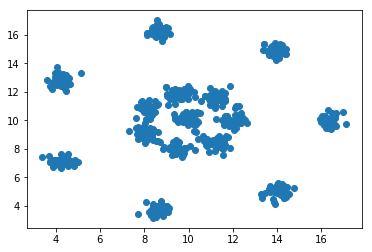

In [12]:
dataSet = bacaData()
data = dataSet.T
plt.scatter(data[0], data[1])
plt.show()

In [35]:
epoch = 10000
neighbor = 1
#jmlN = 15
kolom = 5
baris = 3
LR = 0.4 # Learning Rate
range_max = kolom + baris
vmap = np.random.uniform(4,18,(kolom,baris,2)) # vector map

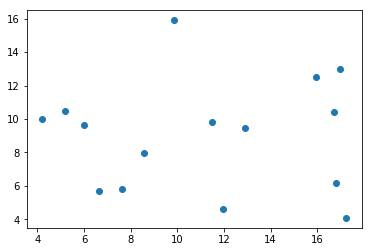

In [36]:
n = np.reshape(vmap,(kolom*baris,2))
n = np.transpose(n)
plt.scatter(n[0], n[1])
plt.show()

In [37]:
for x in range(epoch):
    # update LR
    pct_left = 1 - (x*1.0/epoch)
    curr_range = np.round(pct_left * range_max)
    curr_rate = pct_left * LR
    
    # random
    randInp = dataSet[np.random.randint(len(dataSet))]
    
    bmu = np.array([0,0]) #best match unit
    min_dist = eucDistance(vmap[0][0],randInp)
    for x in range (kolom) :
        for y in range(baris):
            dist = eucDistance(vmap[x][y],randInp)
            if (dist < min_dist) :
                min_dist = dist
                bmu = np.array([x,y])
    # meng-update weight setiap neuron berdasarkan tiap data input
    for x in range (kolom) :
        for y in range(baris):
            if(manhattanDist(bmu[0], bmu[1],x,y) < curr_range) :
                vmap[x][y] = vmap[x][y] + curr_rate * -(vmap[x][y]-randInp)
                
    

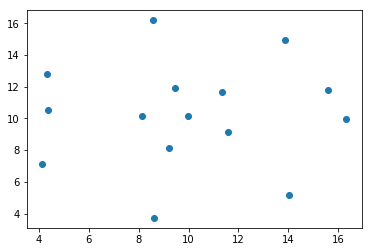

In [38]:
# Show vmap

m = np.reshape(vmap, (kolom * baris, 2)).T
plt.scatter(m[0], m[1])
plt.show()

In [39]:
# Clustering
clust = []
for p in dataSet:
    # mencari vector terdekat
    bmu = np.array([0,0])
    min_dist = eucDistance(vmap[0][0],p)
    for x in range(kolom):
        for y in range(baris):
            dist = eucDistance(vmap[x][y],p)
            if(dist < min_dist):
                min_dist = dist
                bmu = np.array([x,y])
    clust.append([p, bmu[0]+bmu[1]*kolom])

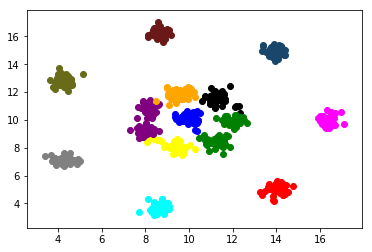

[40. 76. 40. 48. 40. 40. 45. 40. 71. 40.  0. 40. 40. 40.  0.]


In [40]:
# menampilkan hasil clustering
cl = np.zeros(kolom*baris)
for a in clust:
    cl[a[1]] += 1
    if(a[1] == 0):
        plt.scatter(a[0][0], a[0][1], color = "red")
    elif(a[1] == 1):
        plt.scatter(a[0][0], a[0][1], color ="green")
    elif(a[1] == 2):
        plt.scatter(a[0][0], a[0][1], color ="blue")
    elif(a[1] == 3):
        plt.scatter(a[0][0], a[0][1], color = 'yellow')
    elif(a[1] == 4):
        plt.scatter(a[0][0], a[0][1], color = 'cyan')
    elif(a[1] == 5):
        plt.scatter(a[0][0], a[0][1], color = 'magenta')
    elif(a[1] == 6):
        plt.scatter(a[0][0], a[0][1], color ='black')
    elif(a[1] == 7):
        plt.scatter(a[0][0], a[0][1], color ='orange')
    elif(a[1] == 8):
        plt.scatter(a[0][0], a[0][1], color ='purple')
    elif(a[1] == 9):
        plt.scatter(a[0][0], a[0][1], color ='grey')
    elif(a[1] == 10):
        plt.scatter(a[0][0], a[0][1], color ='brown')
    elif(a[1] == 11):
        plt.scatter(a[0][0], a[0][1], color ='#18476b')
    elif(a[1] == 12):
        plt.scatter(a[0][0], a[0][1], color = '#6b1818')
    elif(a[1] == 13):
        plt.scatter(a[0][0], a[0][1], color = '#686b18')
    elif(a[1] == 14):
        plt.scatter(a[0][0], a[0][1], color = '#186b2f')
    else:
        plt.scatter(a[0][0], a[0][1], color = '#186b66')
plt.show()
print(cl)